In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import random

In [4]:
class CreateMemoryNet:
    def __init__(self, size):
        plt.close('all')
        
        self.size = size
        self.start = np.full((size, size), -1)
        self.fig, self.ax = plt.subplots(figsize=(5, 5))
        self.out = widgets.Output()
        self.button = widgets.Button(description="Show Memory Array")
        #self.button.on_click(self.check_letter)
        self.button.on_click(self.show_array)
        
        # Drawing state
        self.is_drawing = False
        self.last_cell = None  # To avoid toggling the same cell multiple times per drag

        # Connect events
        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)

        self.update_plot()

    def on_press(self, event):
        if event.inaxes == self.ax:
            self.is_drawing = True
            self.toggle_or_draw(event, toggle=True)

    def on_motion(self, event):
        if self.is_drawing and event.inaxes == self.ax:
            self.toggle_or_draw(event, toggle=False)

    def on_release(self, event):
        self.is_drawing = False
        self.last_cell = None

    def toggle_or_draw(self, event, toggle):
        x = int(round(event.xdata))
        y = int(round(event.ydata))
        if 0 <= x < self.size and 0 <= y < self.size:
            i, j = self.size - 1 - y, x
            cell = (i, j)
            if toggle:
                # Click toggles between 1 and -1
                self.start[i, j] = -1 if self.start[i, j] == 1 else 1
                self.update_plot()
            else:
                # Drag sets to 1 (only if it's not already and not repeated)
                if cell != self.last_cell and self.start[i, j] != 1:
                    self.start[i, j] = 1
                    self.update_plot()
                    self.last_cell = cell

    def update_plot(self):
        self.ax.clear()
        y, x = np.where(self.start == 1)
        self.ax.scatter(x, self.size - 1 - y, color='black', marker='o')

        self.ax.set_xlim(-0.5, self.size - 0.5)
        self.ax.set_ylim(-0.5, self.size - 0.5)
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.ax.set_aspect('equal')
        for spine in self.ax.spines.values():
            spine.set_visible(False)
        self.ax.grid(True)
        self.fig.canvas.draw_idle()

    def show_array(self, _=None):
        with self.out:
            clear_output(wait=True)
            display(self.button)
            print("Memory Array (1s = dots, -1s = empty):\n")
            print(self.start)
    def interface(self):
        layout = widgets.VBox([
            self.button,  # Top button
            self.out  # And any output below that
        ])
        display(layout)


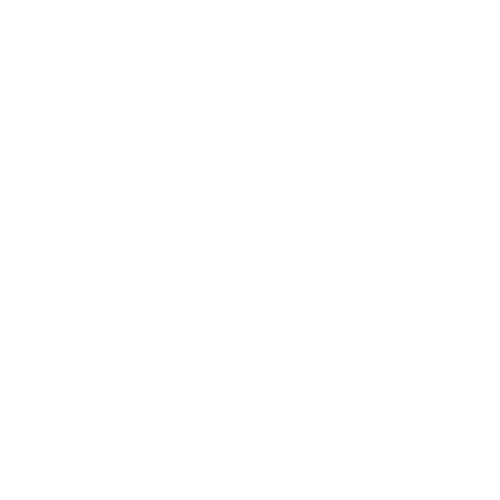

In [21]:
'''
Below prompts you to draw and create new letters for memory in recall program
'''
%matplotlib widget
new = CreateMemoryNet(10)
new.interface()


In [22]:
np.savetxt("memory_pattern_A.csv", new.start, fmt="%d", delimiter=",")